##### import libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
import folium

#### Introduction to GPS Tracking of Birds


In [2]:
bird_data = pd.read_csv("bird_tracking.csv")
bird_data = bird_data.drop(["Unnamed: 0"], axis=1)
bird_data.info()
bird_names = bird_data["bird_name"].unique()
print("Bird names:", bird_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   altitude            61920 non-null  int64  
 1   date_time           61920 non-null  object 
 2   device_info_serial  61920 non-null  int64  
 3   direction           61477 non-null  float64
 4   latitude            61920 non-null  float64
 5   longitude           61920 non-null  float64
 6   speed_2d            61477 non-null  float64
 7   bird_name           61920 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 3.8+ MB
Bird names: ['Eric' 'Nico' 'Sanne']


In [3]:
bird_data.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


#### Simple data visualization


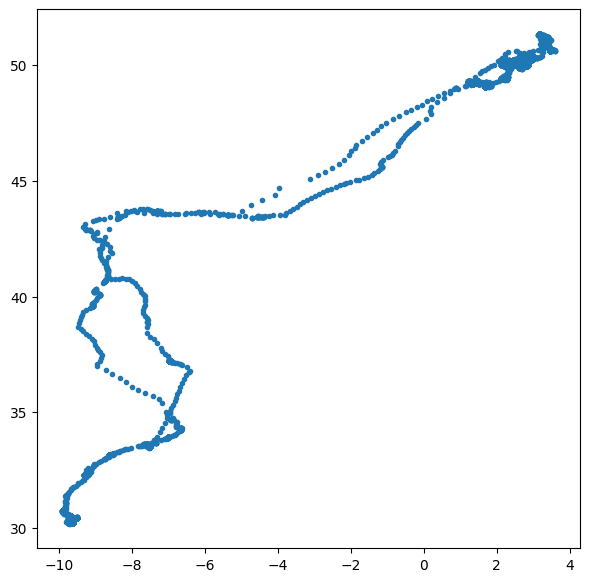

In [4]:
ix = bird_data["bird_name"] == "Eric"
x, y = bird_data["longitude"][ix], bird_data["latitude"][ix]
plt.figure(figsize=(7, 7))
plt.plot(x, y, ".")

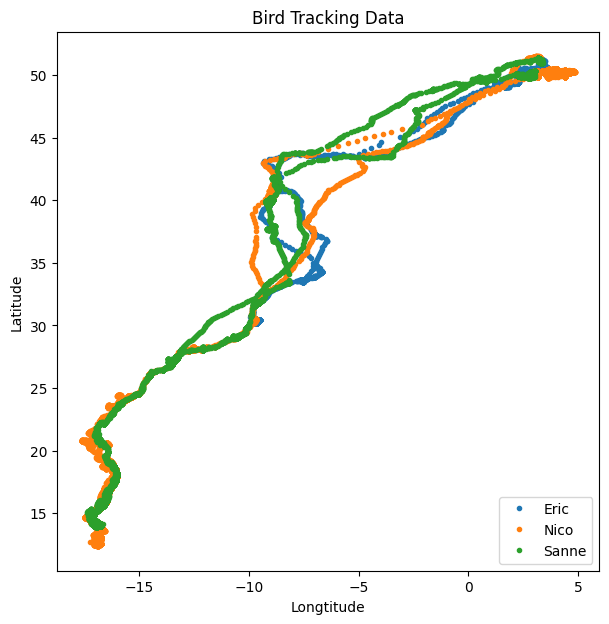

In [5]:
plt.figure(figsize=(7, 7))
for bird_name in bird_names:
    ix = bird_data["bird_name"] == bird_name
    x, y = bird_data["longitude"][ix], bird_data["latitude"][ix]
    plt.plot(x, y, ".", label=bird_name)
plt.xlabel("Longtitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.title("Bird Tracking Data")
plt.savefig("bird_tracking.png")

Text(0, 0.5, 'Frequency')

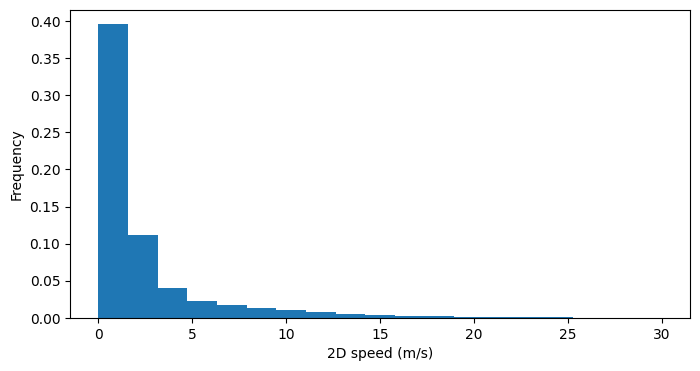

In [6]:
plt.figure(figsize=(8, 4))
ix = bird_data["bird_name"] == "Eric"
speed = bird_data["speed_2d"][ix]
ind = speed.isna()
plt.hist(speed[~ind], bins=list(np.linspace(0, 30, 20)), density=True)
plt.xlabel("2D speed (m/s)")
plt.ylabel("Frequency")

In [7]:
date_str = bird_data["date_time"][0]
date_str[:-3]
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [8]:
timestamp = []
for k in range(len(bird_data)):
    timestamp.append(
        datetime.datetime.strptime(bird_data["date_time"][k][:-3], "%Y-%m-%d %H:%M:%S")
    )

bird_data["timestamp"] = pd.Series(timestamp, index=bird_data.index)
bird_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   altitude            61920 non-null  int64         
 1   date_time           61920 non-null  object        
 2   device_info_serial  61920 non-null  int64         
 3   direction           61477 non-null  float64       
 4   latitude            61920 non-null  float64       
 5   longitude           61920 non-null  float64       
 6   speed_2d            61477 non-null  float64       
 7   bird_name           61920 non-null  object        
 8   timestamp           61920 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 4.3+ MB


In [9]:
print("kiểm tra df sau khi thêm cột timestamp")
bird_data.head()

kiểm tra df sau khi thêm cột timestamp


,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


Text(0, 0.5, 'Elapsed time (days)')

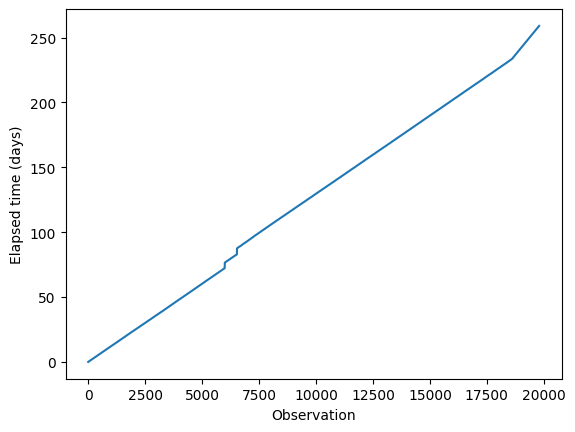

In [10]:
data = bird_data[bird_data["bird_name"] == "Eric"]
times = data["timestamp"]
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)
plt.plot(elapsed_days)
plt.xlabel("Observation")
plt.ylabel("Elapsed time (days)")

##### Calculating Daily Mean Speed


In [11]:
data = bird_data[bird_data["bird_name"] == "Eric"]
times = data["timestamp"]
elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time) / datetime.timedelta(days=1)
print(elapsed_days)

next_day = 1
inds = []
inds_list = (
    []
)  # Lĩnh bổ sung vào để check list of indices dùng để tính daily mean speed
daily_mean_speed = []
for i, t in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(data["speed_2d"][inds].mean())
        inds_list.append(inds)
        next_day += 1
        inds = []  # reset list of indices dùng tính daily mean speed cho ngày tiếp theo
        inds.append(
            i
        )  # nhưng phải save cái index của cái ngày bắt đầu bước sang ngày tiếp theo

[0.0 0.02082175925925926 0.04155092592592593 ... 258.9399652777778
 258.9607175925926 258.9814930555556]


Text(0, 0.5, 'Mean speed $(m/s)$')

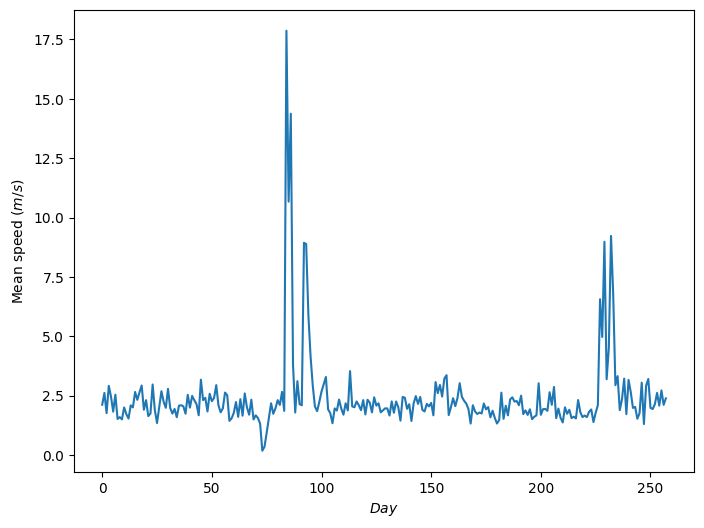

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(daily_mean_speed)
plt.xlabel("$Day$")
plt.ylabel("Mean speed $(m/s)$")

In [13]:
proj = ccrs.Mercator()

plt.figure(figsize=(10, 10))
ax = plt.axes(projection=proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.BORDERS, linestyle=":")

for bird_name in bird_names:
    ix = bird_data["bird_name"] == bird_name
    x, y = bird_data["longitude"][ix], bird_data["latitude"][ix]
    ax.plot(x, y, ".", transform=ccrs.Geodetic(), label=bird_name)
plt.legend(loc="upper left")

NameError: name 'ccrs' is not defined

In [ ]:
world_map = folium.Map()

In [ ]:
paths = folium.map.FeatureGroup()
for (
    lat,
    lng,
) in zip(bird_data["latitude"], bird_data["longitude"]):
    paths.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,  # define how big you want the circle markers to be
            color="yellow",
            fill=True,
            fill_color="blue",
            fill_opacity=0.6,
        )
    )
world_map.add_child(paths)

In [ ]:
import gpxpy
import gpxpy.gpx
import folium

gpx_file = open("path_to_gpx_file.gpx", "r")

gpx = gpxpy.parse(gpx_file)
points = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            points.append(tuple([point.latitude, point.longitude]))
print(points)
ave_lat = sum(p[0] for p in points) / len(points)
ave_lon = sum(p[1] for p in points) / len(points)

# Load map centred on average coordinates
my_map = folium.Map(location=[ave_lat, ave_lon], zoom_start=14)

# add a markers
for each in points:
    folium.Marker(each).add_to(my_map)

# fadd lines
folium.PolyLine(points, color="red", weight=2.5, opacity=1).add_to(my_map)

# Save map
my_map.save("./gpx_berlin_withmarker.html")